### Titanic Survival Prediction

In this notebook, I will go over how I build classificaiton models for predicting Titanic passenger survival. I divide it into EDA, Data preprocessing (impute missing, encode categorical variables and creat new columns), and Model building. 

Background story:
The skinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [833]:
1502/2224

0.6753597122302158

In [834]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#import lib
# import google.datalab.bigquery as bq
# import google.datalab.storage as storage
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# from __future__ import division

#Importing libraries
# !pip install plotly

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
!pip install category_encoders
import category_encoders as ce
# import io
# Thanks to Thomas, here is the solution I was looking for:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [835]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,ExtraTreesClassifier 
import xgboost as XGB
import sklearn as skn
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import make_scorer, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from random import seed
from random import random
import random
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# from sklearn import cross_validation, metrics   #Additional scklearn functions
# from sklearn.grid_search import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


### Machine learning Note: 

It's important to note, more predictor variables do not make a better model, but the right variables.


#### The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting


In this stage, we will clean our data by 1) correcting aberrant values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation.

##### Correcting: 
Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have potential outliers in age and fare. However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. It should be noted, that if they were unreasonable values, for example age = 800 instead of 80, then it's probably a safe decision to fix now. However, we want to use caution when we modify data from its original value, because it may be necessary to create an accurate model.
##### Completing: 
There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before we start modeling, because we will compare and contrast several models. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. **A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES.** There are more complex methodologies, however before deploying, it should be compared to the base model to determine if complexity truly adds value. For this dataset, age will be imputed with the median, the cabin attribute will be dropped, and embark will be imputed with mode. **Subsequent model iterations may modify this decision to determine if it improves the model’s accuracy**.
##### Creating: 
Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.
##### Converting:
Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, **we will convert object datatypes to categorical dummy variables**.

### Import the data


In [836]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [837]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


See features type and if feature conversion is needed
Common data types:
* Categorical features: nominal, ordinal, interval
   * Ordinal: Pclass
   * Nominal: Sex,  Ticket, Cabin, embarked (port of Embarkation)
* Numerical features: discrete, continuous, timeseries based features
    * SibSp (number of siblings), parch (number of parents), Fare

## EDA

## Missing values

* Age has 177 missing value, we can impute the missing values later
* Cabin: missing rate is high and there is no apparent trend of this feature, we can drop it 

In [838]:
print('The missing rate of training set is ', train_df.isnull().sum()/train_df.shape[0])
print('The missing rate of testing set is', test_df.isnull().sum()/test_df.shape[0])

The missing rate of training set is  PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64
The missing rate of testing set is PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


### Whats is the distribution of numerical feature values across the samples?

In [839]:
train_df.dtypes
print('-'*40)
test_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

----------------------------------------


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [840]:
train_df.describe(include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Background story: 1502 of 2224 passengers dead

In [841]:
print('The survival rate of total population is',1-1501/2224)

The survival rate of total population is 0.325089928057554


* According to the sample (our training set), we have survival rate of 38%, which is close to the actual survival rate of the population 
* 38% of people travel with parents 

### What's the distribution of categorical variables

Categorical features: nominal, ordinal, interval </br>

Ordinal: Pclass </br>

Nominal: Sex, Ticket, Cabin, embarked (port of Embarkation)

In [842]:
train_df.describe(include = [object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Coutts, Master. Eden Leslie ""Neville""",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


* Name are unique across the dataset (count=unique)
* Sex : 577 male (65% male)
* Ticket feature has high ratio of duplicate values (22%) 
* Embarked : 3 possible value with S as the most common one (72% of ppl embarked at S)

Age and Cabin have null values 

In [843]:
#Age and Cabin have null values 
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [844]:
train_df.shape

(891, 12)

In [845]:
print('Cabin has large missing rate', 687/891, 'we should drop this feature')

Cabin has large missing rate 0.7710437710437711 we should drop this feature


## Analyze by visualizing data ---Numerical Feature

Histogram: 		
*  A great way to get started exploring a single variable is with the histogram, a histogram divides the variable into bins, count the data points in each bin, and shows the bins on the x-axis and the counts on y-axis. 
*  Why using density plot over histogram?
	Histograms are a great way to start exploring a single variable, however, when we want to compare the distributions of one variable across multiple categories, histograms have issues with readability. 



*  Density Plot
		○ Density plots can be thought of as plots of smoothed histograms
		○ The smoothness is controlled by a bandwidth parameter that is analogous to the histogram binwidth
		○ Density estimates are generally computed at a grid of points and interpolated. 
* Computational effort for a density estimate at a point is proportional to the number of observations 

### 1. Age

#### Findings of Age
* 75% of ppl within the age range of 0-40 and age is skewed </br>
* 0-14 , and 80 have higher survival rate
* 16 -44 survival rate is comparatively lower than younger and older people 
* 177 individuals have missing age, it needs imputation later



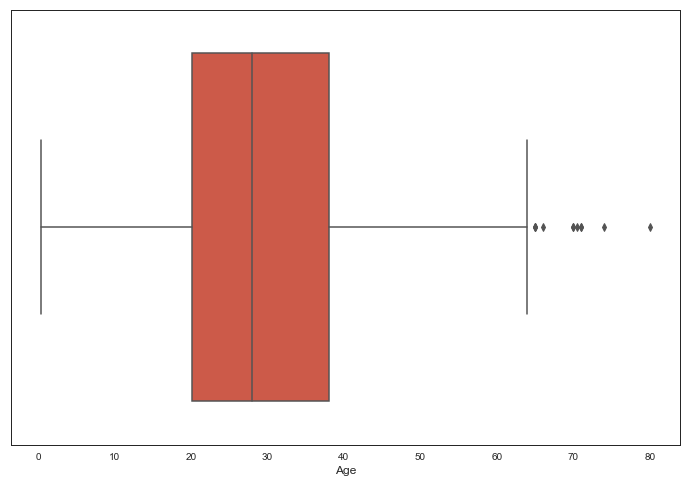

In [846]:
sns.boxplot(x = train_df.Age)

In [847]:
# train_df['Age'].value_counts().sort_values()
train_df['Age'].isnull().sum()

177

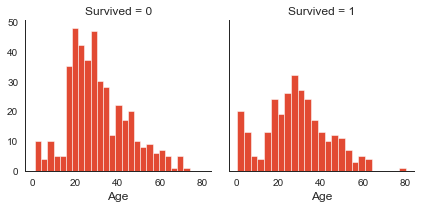

In [848]:
#Histogram of Age
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=25)

See the survival rate by Age group to see clearer pattern. I use qcut to discretize age into equal-sized buckets

In [849]:
# #see survival rate by age band 
# train_df['AgeBand'] = pd.qcut(train_df.Age, 3)

In [850]:
# train_df[['AgeBand', 'Survived']].groupby(['AgeBand']).mean('Survived')
# train_df.groupby(['AgeBand']).count()

In [851]:
age_1 = train_df[['Age', 'Survived']].groupby('Age').mean('Survived')
age_1.reset_index(inplace=True)

<Figure size 1440x504 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

Text(0.5, 1.0, 'Age and Survival Rate')

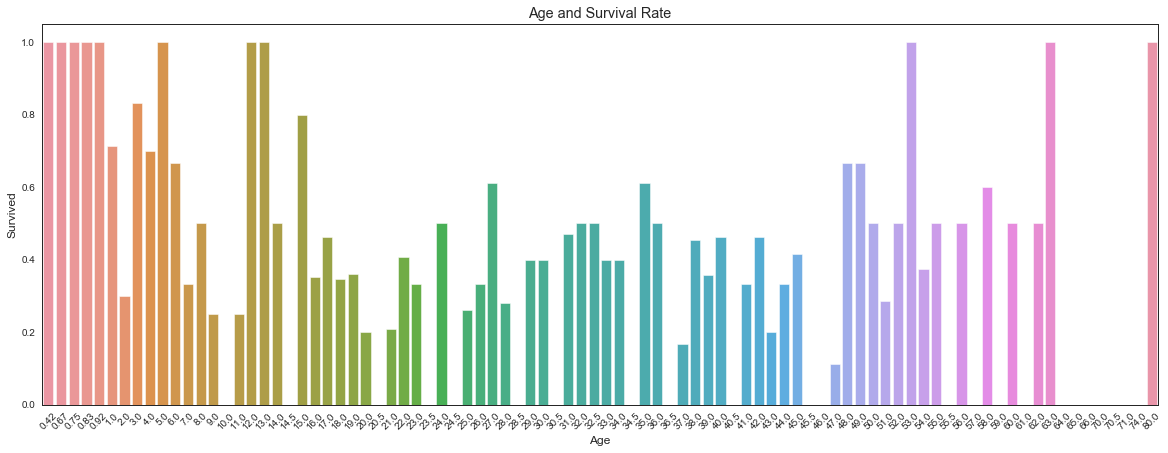

In [852]:
plt.figure(figsize=(20,7))
sns.barplot(x="Age", y="Survived", data = age_1)
# plt.xticks(x[::2])
plt.xticks(rotation='45')
plt.title('Age and Survival Rate')

#### Fare
* 75% of people pay Fare at fairly lower price , around 0-31
* Passengers paid higher fare have higher survival rate


In [853]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

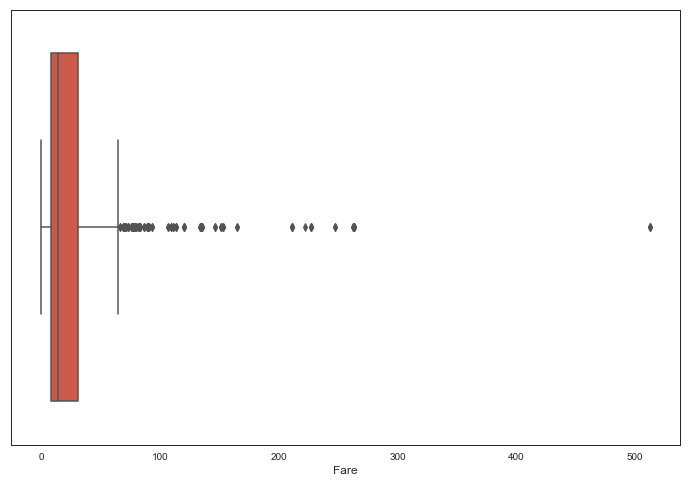

In [854]:
sns.boxplot(x = train_df.Fare)

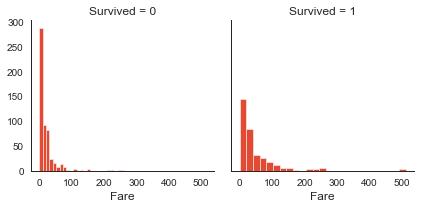

In [855]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Fare',bins=25)

##### SipSP  & Parch --we can use these two columns to generate new features
*  SipSP: number of sibliongs/spouses aboard the Titanic
* parch: number of parents/ children aboard the Titanic <br>
we can generate  <br>
*is_alone*: if the passenger is travel alone? Y: passenger has 0 SibSp and 0 Parch, N: travel with family <br>
*family_cnt* : number of family member travel with the passenger. I will use SibSp + Parch to compute this column



In [856]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [857]:
print('% of ppl travel without siblings', 608/891*100)

% of ppl travel without siblings 68.23793490460157


In [858]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### Corrlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

### 1. Pclass and Age

From below plot we can tell 
* PClass 1 have higher survival rate than Pclass 2 and 3, therefore, the better the Pclass, the more likely passengers are survived. Pclass is ordinal categorical variable, so we don't need to one-hot encode this column
* Younger people tend to be at Pclass = 3, there is an association between Pclass and Age, we can use Pclass to impute missing age

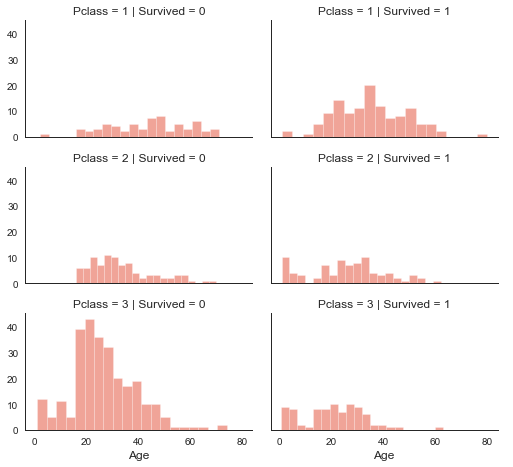

In [859]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

We can tell Pclass 3 has comparatively younger passengers

In [860]:
#Pclass and average age
train_df[['Pclass', 'Age']].groupby('Pclass').mean('Age')

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


### 2.Embarked, Pclass, Sex 

* Female have higher survival rate than male across all Embarked
* Passengers who embared at C (Cherbourg) have higher survival rate. we should re-encode embark using 1,2,3 based on survival rate. C:1, Q:2, S: 3


Decision
* add sex and embarked to model training
* re-encode embark to 1,2,3




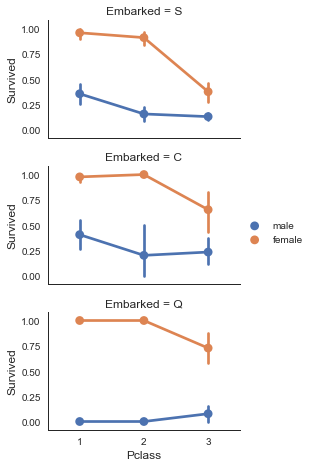

In [861]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1,2,3],
         hue_order = ['male', 'female'])
grid.add_legend()

In [862]:
#Embark and survival rate
train_df[['Embarked', 'Survived']].groupby('Embarked').mean('Survived')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


## Wrangle data 

### 1. Drop irrelevant features: 把training 和test set的feature都drop掉来保持一致性

In [863]:
train_df = train_df.drop(['Ticket', 'Cabin','PassengerId'], axis = 1)
test_df = test_df.drop (['Ticket', 'Cabin','PassengerId'], axis =1 )
combine = [train_df, test_df]

In [864]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### 2. Impute missing values

##### 2.1 Impute missing Age

I will use each Pclass's mean impute missing age

In [865]:
# Impute age based on Pclass 
#Get age mode of each Pclass
train_df[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [866]:
train_df['Age']=train_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

test_df['Age']=test_df.groupby('Pclass')['Age'].transform(lambda x : x.fillna(x.mean()))

combine = [train_df, test_df]

In [867]:
#No missing value in Age column
train_df['Age'].isnull().sum()
test_df['Age'].isnull().sum()

0

0

##### 2.1 Impute missing Embarked

In [868]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [869]:
for dataset in combine:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [870]:
train_df['Embarked'].isnull().sum()
test_df['Embarked'].isnull().sum()

0

0

In [871]:
train_df['Age'].isnull().sum()
test_df['Age'].isnull().sum()

0

0

### 3. Creating new feature extracting from existing

Regular expression: 
\w - word character (a-z, A-Z, 0-9, ...)

'+' : 1 or More 

\. : backlash period to search for that literal period

https://www.programiz.com/python-programming/regex

### 3.1 Create Title from Name
[] - square brackets specifies a set of charaters you wish to match 

[A-Za-z] : [ABCD....Z abcd....z]

In [872]:
# for dataset in combine:
#     dataset.Name.str.extract(r'\w+\.')


for dataset in combine:
    dataset['Title'] =dataset.Name.str.extract(r'(\w+)\.', expand=False)  ##dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    

In [873]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [874]:
#replace Sir as Mr
for df in combine:
    df['Title'] = df['Title'].replace('Sir', 'Mr')
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [875]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,518
Mrs,126,0
Rare,3,19


In [876]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.158301
3,Mrs,0.793651
4,Rare,0.318182


In [877]:
#Drop Name column after generating Title
for dataset in combine:
    dataset.drop(['Name'], axis = 1, inplace=True)

### 3.2 Create family member column using SibSp

If Passenger travel with family, they will have higher survival rate

In [878]:
for dataset in combine:
    dataset['Fam_mem'] = dataset['SibSp'] + dataset['Parch'] +1 #family set +1 means if there is no fam, this person is by himself, so he is the only one in his family, famsize=1
    


In [879]:
for dataset in combine:
    dataset['IsAlone'] = 0 
    dataset.loc[dataset['Fam_mem'] ==1, 'IsAlone'] =1 #if by himself, then he is alone


In [880]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [881]:
#drop sibSp and Parch as we don't need them
for dataset in combine:
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)

### Transform the data : encoding

In [882]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Fam_mem,IsAlone
0,0,3,male,22.0,7.2500,S,Mr,2,0
1,1,1,female,38.0,71.2833,C,Mrs,2,0
2,1,3,female,26.0,7.9250,S,Miss,1,1
3,1,1,female,35.0,53.1000,S,Mrs,2,0
4,0,3,male,35.0,8.0500,S,Mr,1,1


#### Encode Embared C:1, Q:2, S: 3


In [883]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].replace(['C','Q','S'], [1,2,3])

One Hot encode Sex, Title

In [884]:
from sklearn.preprocessing import OneHotEncoder

In [885]:
# for dataset in combine:
#     sex =pd.get_dummies(dataset['Sex'])
#     dataset =pd.concat([dataset, sex], axis=1)
# # pd.get_dummies(train_copy['Sex'])

In [886]:
sex =pd.get_dummies(train_df['Sex'])
train_df = pd.concat([train_df, sex], axis=1)
train_df.drop (['Sex'], axis=1, inplace=True)

sex =pd.get_dummies(test_df['Sex'])
test_df = pd.concat([test_df, sex], axis=1)
test_df.drop (['Sex'], axis=1, inplace=True)

In [887]:
title = pd.get_dummies(train_df['Title'])
train_df = pd.concat([train_df, title], axis=1)
train_df.drop(['Title'], axis=1, inplace=True)

In [888]:
title = pd.get_dummies(test_df['Title'])
test_df = pd.concat([test_df, title], axis=1)
test_df.drop(['Title'], axis=1, inplace=True)

In [889]:
combine=[train_df, test_df]

In [890]:
train_df.head()

,Survived,Pclass,Age,Fare,Embarked,Fam_mem,IsAlone,female,male,Master,Miss,Mr,Mrs,Rare
0,0,3,22.0,7.2500,3,2,0,0,1,0,0,1,0,0
1,1,1,38.0,71.2833,1,2,0,1,0,0,0,0,1,0
2,1,3,26.0,7.9250,3,1,1,1,0,0,1,0,0,0
3,1,1,35.0,53.1000,3,2,0,1,0,0,0,0,1,0
4,0,3,35.0,8.0500,3,1,1,0,1,0,0,1,0,0


### Normalize Numerical variables : Age, Fare

### 1. Fare
Fare is a highly skewed feature according to histogram, we should transform the feature so that the very large and very small values do not negatively affect the perormance of a learning algorithm. However, Log (0) is undefined, so I will use log(x+1) to transform

In [891]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Figure size 576x288 with 0 Axes>

(array([ 17., 320., 129.,  53.,  43., 104.,  31.,  19.,   4.,  12.,  23.,
         16.,   6.,  12.,  10.,  19.,  10.,   8.,   2.,   0.,   2.,   6.,
          3.,   4.,   0.,   0.,   7.,   0.,   2.,   7.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   1.,
          4.,   0.,   0.,   0.,   2.,   0.,   0.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([  0.      ,   5.123292,  10.246584,  15.369876,  20.493168,
         25.61646 ,  30.739752,  35.863044,  40.986336,  46.109628,
         51.23292 ,  56.356212,  61.479504,  66.602796,  71.726088,
         76.84938 ,  81.972672,  87.095964,  92.219256,  97.342548,
        102.46584 , 107.589132, 112.712424, 11

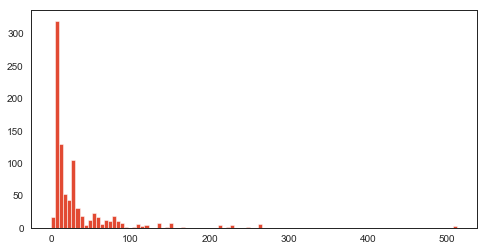

In [892]:
plt.figure(figsize=(8,4))
plt.hist(train_df['Fare'], bins=100)

In [893]:
transformed_fare = train_df['Fare'].apply(lambda x: np.log(x+1))

<Figure size 576x288 with 0 Axes>

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Distribution of Fare after log-transformation')

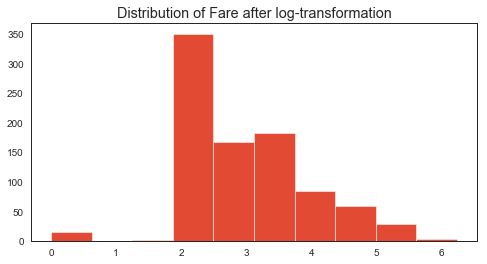

In [894]:
plt.figure(figsize=(8,4))
plt.hist(transformed_fare)
plt.title('Distribution of Fare after log-transformation')

It looks better after log transformation 

In [895]:
train_df['Fare'] = transformed_fare
test_df['Fare'] = test_df['Fare'].apply(lambda x: np.log(x+1))
combine=[train_df, test_df]

### 2. Age & Fare

In addition to performing transformations on highly skewed features, I will perform some type of scaling on Age and Fare. Applying a scaling to the data does not change the shape of each feature's distribution; however, normalization ensures that each feature is treated equally when applying supervised leaneres. Note that noce scalling is applied, observing the data in its raw form will no longer have the same original meaning, so it should be done after EDA

In [896]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['Age', 'Fare']
train_df[numerical] = scaler.fit_transform(train_df[numerical])

In [897]:
test_df[numerical] = scaler.fit_transform(test_df[numerical])
combine=[train_df, test_df]

## Modeling

When it comes to data modeling, the beginner’s question is always, "what is the best machine learning algorithm?" To this the beginner must learn, the No Free Lunch Theorem (NFLT) of Machine Learning. In short, NFLT states, there is no super algorithm, that works best in all situations, for all datasets. So the best approach is to try multiple MLAs, tune them, and compare them for your specific scenario. With that being said, some good research has been done to compare algorithms, such as Caruana & Niculescu-Mizil 2006 watch video lecture here of MLA comparisons, Ogutu et al. 2011 done by the NIH for genomic selection, Fernandez-Delgado et al. 2014 comparing 179 classifiers from 17 families, Thoma 2016 sklearn comparison, and there is also a school of thought that says, more data beats a better algorithm.

So with all this information, where is a beginner to start? I recommend starting with Trees, Bagging, Random Forests, and Boosting. They are basically different implementations of a decision tree, which is the easiest concept to learn and understand. They are also easier to tune, discussed in the next section, than something like SVC. Below, I'll give an overview of how-to run and compare several MLAs, but the rest of this Kernel will focus on learning data modeling via decision trees and its derivatives.

***1. Split the data into training and testing set***

Split the train_df to training and testing set for the analysis. The test_df is the testing set provided by Kaggle, it will not be used on training model.

In [898]:
train_df.head()

,Survived,Pclass,Age,Fare,Embarked,Fam_mem,IsAlone,female,male,Master,Miss,Mr,Mrs,Rare
0,0,3,0.271174,0.338125,3,2,0,0,1,0,0,1,0,0
1,1,1,0.472229,0.685892,1,2,0,1,0,0,0,0,1,0
2,1,3,0.321438,0.350727,3,1,1,1,0,0,1,0,0,0
3,1,1,0.434531,0.639463,3,2,0,1,0,0,0,0,1,0
4,0,3,0.434531,0.352955,3,1,1,0,1,0,0,1,0,0


In [899]:
y = train_df['Survived']
x=train_df.drop(['Survived'], axis=1)

In [900]:
from sklearn.model_selection import train_test_split
#split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [901]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((623, 13), (268, 13), (268,), (623,))

***2. Model training***


Let's try different classification model without any tuning 

In [902]:
MLA = [    #Ensemble Methods
    AdaBoostClassifier(),
#     BaggingClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),

   #GLM
    linear_model.LogisticRegressionCV(),
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
        #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()  
    
]

#split the data through cross validation 
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0 )

#create summary table column names
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean',
               'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
# MLA_compare.head()
MLA_predict = y_train.copy()

row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
#     print(alg)
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv= cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, y_train)
    MLA_predict[MLA_name] = alg.predict(X_train)
    
    row_index+=1

    
# #print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
# MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
# MLA_compare
# #MLA_predict

AdaBoostClassifier()

ExtraTreesClassifier()

RandomForestClassifier()

LogisticRegressionCV()

SVC(probability=True)

NuSVC(probability=True)

LinearSVC()

DecisionTreeClassifier()

ExtraTreeClassifier()

XGBClassifier()

In [903]:
MLA_compare.sort_values('MLA Test Accuracy Mean',ascending=False, inplace=True)

Since this compitition successful metrics is Accuracy, I will chooose **Test Accuracy Mean** as evaluation metrics. It seems like XGBoost is the best performing model, so I will use this model and do hyper paramter tuning to see if that increase Accuracy

In [904]:
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.834633,0.827807,0.0501192,0.0233131
6,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.830275,0.82139,0.0513369,0.0165458
3,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.829817,0.817647,0.0514621,0.420443
5,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.827752,0.817112,0.0713137,0.02459
9,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.888991,0.809091,0.0418652,0.0445258
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.845183,0.794118,0.0597042,0.0622647
2,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.988991,0.793048,0.044256,0.128342
1,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.988991,0.77861,0.0700024,0.104573
7,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.988991,0.756684,0.0925072,0.00328507
8,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.988991,0.746524,0.0681393,0.00302069


***Evaluate Model Performance***

We already get Accuracy of 84.59% without parameter tuning. But the question we need to think about is should we invest our time to get a better accuracy? It depends on the obejective of the analysis, is this for a research / is this for company use? Most of time, we are satified with 84.58% in business and we will not devote too much time on improving the model. i.e thinking about increaseing 1/10 of accuracy will take 3 month of development

***Determine a Baseline Accuracy***

Before we decide how-to make our model better, let's determine if our model is even worth keeping. To do that, we have to go back to the basics of data science 101. We know this is a binary problem, because there are only two possible outcomes; passengers survived or died. So, think of it like a coin flip problem. If you have a fair coin and you guessed heads or tail, then you have a 50-50 chance of guessing correct. So, let's set 50% as the worst model performance; because anything lower than that, then why do I need you when I can just flip a coin?

Okay, so with no information about the dataset, we can always get 50% with a binary problem. But we have information about the dataset, so we should be able to do better. We know that 1,502/2,224 or 67.5% of people died. Therefore, if we just predict the most frequent occurrence, that 100% of people died, then we would be right 67.5% of the time. So, let's set 68% as bad model performance, because again, anything lower than that, then why do I need you, when I can just predict using the most frequent occurrence.



### Parameter Tuning - XGBoost

In [753]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [754]:
MLA_compare.loc[9,'MLA Parameters']

"{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}"

In [755]:
# xgb=XGBClassifier(objective= 'binary:logistic')
# modelfit(xgb,X_train,y_train )


In [756]:
xgb1=XGBClassifier(objective= 'binary:logistic').fit(X_train,y_train)
xgb1.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [757]:
predictors = [x for x in train_df.columns if x not in ['Survived']]
target='Survived'

In [909]:
param_grid = {'n_estimators' : [90,100,150,200], 'max_depth':[3,5,10,15]}
tune_model = model_selection.GridSearchCV(XGBClassifier(objective= 'binary:logistic')
                                          , param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(X_train, y_train)


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=None),
             estimator=XGBClassifier(),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'n_estimators': [90, 100, 150, 200]},
             scoring='roc_auc')

In [910]:
tune_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [911]:
print('AFTER xgboost Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
# print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER xgboost Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER xgboost Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

AFTER xgboost Parameters:  {'max_depth': 3, 'n_estimators': 100}
AFTER xgboost Test w/bin score mean: 83.58
AFTER xgboost Test w/bin score 3*std: +/- 4.54
----------


### Generate submission file

In [912]:
xgb1=XGBClassifier(objective= 'binary:logistic', max_depth = 3 , n_estimators=100).fit(X_train,y_train)

In [913]:
test_y = xgb1.predict(test_df)

In [914]:
test_df1 = pd.read_csv('test.csv')

In [915]:
test_y=pd.DataFrame(test_y, columns=['Survived'])

In [916]:
test1 = test_df.merge(test_y, how='inner',left_index=True, right_index=True)

In [917]:
sub=test1.merge(test_df1, how='inner', left_index=True, right_index=True)

In [918]:
sub.columns

Index(['Pclass_x', 'Age_x', 'Fare_x', 'Embarked_x', 'Fam_mem', 'IsAlone',
       'female', 'male', 'Master', 'Miss', 'Mr', 'Mrs', 'Rare', 'Survived',
       'PassengerId', 'Pclass_y', 'Name', 'Sex', 'Age_y', 'SibSp', 'Parch',
       'Ticket', 'Fare_y', 'Cabin', 'Embarked_y'],
      dtype='object')

In [919]:
result_sub = sub[['PassengerId','Survived']]

In [920]:
result_sub.to_csv('submission2.csv')